In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from glob import glob
import earthpy as epy
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

In [2]:
# path = "/media/ankith/New Volume"
path = "/media/ankith/New Volume/BigEarthNet-S2-v1.0/BigEarthNet-v1.0"

import os
dir_list = os.listdir(path)
# dir_list = dir_list[:2]
dir_len = len(dir_list)
print(dir_len)
dir_list

590326


['S2A_MSIL2A_20170613T101031_0_45',
 'S2A_MSIL2A_20170613T101031_0_46',
 'S2A_MSIL2A_20170613T101031_0_47',
 'S2A_MSIL2A_20170613T101031_0_48',
 'S2A_MSIL2A_20170613T101031_0_49',
 'S2A_MSIL2A_20170613T101031_0_50',
 'S2A_MSIL2A_20170613T101031_0_51',
 'S2A_MSIL2A_20170613T101031_0_52',
 'S2A_MSIL2A_20170613T101031_0_53',
 'S2A_MSIL2A_20170613T101031_0_54',
 'S2A_MSIL2A_20170613T101031_0_55',
 'S2A_MSIL2A_20170613T101031_0_56',
 'S2A_MSIL2A_20170613T101031_0_57',
 'S2A_MSIL2A_20170613T101031_0_58',
 'S2A_MSIL2A_20170613T101031_0_59',
 'S2B_MSIL2A_20170906T101019_42_64',
 'S2B_MSIL2A_20170906T101019_42_65',
 'S2B_MSIL2A_20170906T101019_42_66',
 'S2B_MSIL2A_20170906T101019_42_67',
 'S2B_MSIL2A_20170906T101019_42_68',
 'S2B_MSIL2A_20170906T101019_42_69',
 'S2B_MSIL2A_20170906T101019_42_7',
 'S2B_MSIL2A_20170906T101019_42_70',
 'S2B_MSIL2A_20170906T101019_42_71',
 'S2B_MSIL2A_20170906T101019_42_72',
 'S2B_MSIL2A_20170906T101019_42_73',
 'S2B_MSIL2A_20170906T101019_42_74',
 'S2B_MSIL2A_2017

In [3]:
# import random

# rndm_dir = dir_list.copy()
# random.shuffle(rndm_dir)

# rndm_dir[:50000]

In [4]:
# rdm_array = np.array(rndm_dir)
# np.save("rndm_dir",rdm_array)

In [5]:
rdm_array = np.load("rndm_dir.npy")
rdm_array[:5]

array(['S2A_MSIL2A_20171221T112501_84_49',
       'S2A_MSIL2A_20171221T112501_3_4',
       'S2A_MSIL2A_20180413T95032_39_19',
       'S2B_MSIL2A_20171206T094349_60_5',
       'S2A_MSIL2A_20180506T100031_22_48'], dtype='<U32')

1
All the available bands with their shapes: 
pngg/S2A_MSIL2A_20171221T112501_84_49.png
[[[0.12575613 0.0910538  0.05412289 ... 0.11811525 0.07895575 0.01751035]
  [0.14040115 0.11111111 0.05571474 ... 0.12957657 0.110156   0.06813117]
  [0.0942375  0.09519261 0.10092327 ... 0.16109519 0.21553645 0.18529131]
  ...
  [0.01177969 0.03438395 0.03979624 ... 0.32091691 0.29258198 0.19293219]
  [0.05125756 0.0359758  0.0423432  ... 0.19738937 0.07609042 0.02610634]
  [0.06176377 0.05348615 0.0455269  ... 0.03215536 0.00986947 0.01209806]]

 [[0.24068768 0.19961796 0.11620503 ... 0.2330468  0.15822986 0.07354346]
  [0.2425979  0.21426297 0.14645018 ... 0.26042662 0.22827125 0.15027061]
  [0.18019739 0.17605858 0.18688316 ... 0.30659026 0.35816619 0.3231455 ]
  ...
  [0.05380452 0.08882521 0.10633556 ... 0.47946514 0.47023241 0.39127666]
  [0.09487424 0.10983763 0.10983763 ... 0.3823623  0.20821394 0.13180516]
  [0.13689908 0.11493155 0.08436804 ... 0.12320917 0.08914358 0.07895575]]

 [[0.241

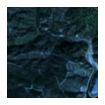

In [16]:
import cv2
from rasterio.plot import reshape_as_raster, reshape_as_image
from rasterio.plot import show
from rasterio.plot import adjust_band



count = 1

for j in rdm_array[:1]:
    #rgb 432
    print(count)
    count += 1
    folder_path = j
    S_sentinel_bands = glob(path+"/"+folder_path+"/*B?*.tif")
    S_sentinel_bands.sort()
    S_sentinel_bands[1:4]

    # r = cv2.imread(S_sentinel_bands[3])
    # g = cv2.imread(S_sentinel_bands[2])
    # b = cv2.imread(S_sentinel_bands[1])

    l = []

    print("All the available bands with their shapes: ")

    for i in S_sentinel_bands:
        with rio.open(i, "r") as f:
            l.append(f.read(1))
#     for idx, i in enumerate(l):
#         if idx+1 < 10:
#             print(f"B0{idx+1}: {i.shape}")
#         else:
#             print(f"B{idx+1}: {i.shape}")

    rgb_l = l[1:4]
    rgb_norm = adjust_band(rgb_l) # normalize bands to range between 1.0 to 0.0
    rgb_reshaped = reshape_as_image(rgb_norm) # reshape to [rows, cols, bands]
    fig, axs = plt.subplots(figsize=(10/6,10/6))

    # 1.5555555556, 1.5555555556
    # the rasterio show function takes in [bands, rows, cols] so we don't need to reshape
#     show(rgb_norm, ax=axs)
    # axs.set_title("RGB from rasterio show")

    # plot with normal matplotlib functions
    axs.imshow(rgb_reshaped)
    plt.axis("off")
    dirr_img = "pngg/"+j+".png"
    print(dirr_img)
    print(rgb_norm)
    plt.savefig(dirr_img)
    # axs[1].set_title("RGB in matplotlib imshow")


    # # use the matplotlib.pyplot function "imshow" for an image -- nir at first
    # fig, ax = plt.subplots()
    # ax.imshow(rgb_l[2])
    # plt.savefig("test.png")
    # arr_st = np.stack(rgb_l)

    # json_path = glob(path+"/"+folder_path+"/*labels*.json")
    # data = json.load(open(json_path[0]))
    # print(data["labels"])



    # merged = cv2.merge([rgb_l[2], rgb_l[1], rgb_l[0]])
    # plt.imshow(merged)
    # plt.show()

(120, 120, 3)
(3, 120, 120)


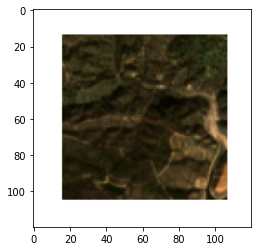

In [21]:
f = cv2.imread(dirr_img)
print(f.shape)
fre = np.reshape(f,(3,120,120))
print(fre.shape)
plt.imshow(f)
plt.show()

In [6]:
labels_list = []
for i in rdm_array[:10000]:
    folder_path = i
    json_path = glob(path+"/"+folder_path+"/*labels*.json")
    data = json.load(open(json_path[0]))
    labels_list.append(data["labels"])
print(len(labels_list))

10000


In [7]:
!ls

'Rough Work.ipynb'	     np_array.npy		        test.png
 Test.ipynb		     preprocess_images_till_50K.ipynb
'install everything.ipynb'   rndm_dir.npy


In [8]:
# Unique_labels = ["Mixed forest",
# "Coniferous forest",
# "Non-irrigated arable land",
# "Transitional woodland/shrub",
# "Broad-leaved forest",
# "Land principally occupied by agriculture, with significant areas of natural vegetation Complex cultivation patterns",
# "Pastures",
# "Water bodies",
# "Sea and ocean",
# "Discontinuous urban fabric",
# "Agro-forestry areas",
# "Peatbogs",
# "Permanently irrigated land",
# "Industrial or commercial units",
# "Natural grassland",
# "Olive groves",
# "Sclerophyllous vegetation",
# "Continuous urban fabric",
# "Water courses",
# "Vineyards",
# "Annual crops associated with permanent crops Inland marshes",
# "Moors and heathland",
# "Sport and leisure facilities",
# "Fruit trees and berry plantations",
# "Mineral extraction sites",
# "Rice fields",
# "Road and rail networks and associated land Bare rock",
# "Green urban areas",
# "Beaches, dunes, sands",
# "Sparsely vegetated areas",
# "Salt marshes",
# "Coastal lagoons",
# "Construction sites",
# "Estuaries",
# "Intertidal flats",
# "Airports",
# "Dump sites",
# "Port areas",
# "Salines",
# "Burnt areas"
# ]
# len(Unique_labels)

In [9]:
# labels_list = []
# for i in rdm_array[:10000]:
#     folder_path = i
#     json_path = glob(path+"/"+folder_path+"/*labels*.json")
#     data = json.load(open(json_path[0]))
#     labels_list.append(data["labels"])
# print(len(labels_list))

In [10]:
labels_list

[['Vineyards',
  'Olive groves',
  'Agro-forestry areas',
  'Transitional woodland/shrub',
  'Water bodies'],
 ['Discontinuous urban fabric',
  'Complex cultivation patterns',
  'Land principally occupied by agriculture, with significant areas of natural vegetation',
  'Broad-leaved forest',
  'Coniferous forest',
  'Mixed forest',
  'Transitional woodland/shrub'],
 ['Non-irrigated arable land',
  'Land principally occupied by agriculture, with significant areas of natural vegetation',
  'Broad-leaved forest',
  'Coniferous forest',
  'Mixed forest',
  'Transitional woodland/shrub'],
 ['Non-irrigated arable land'],
 ['Discontinuous urban fabric',
  'Industrial or commercial units',
  'Non-irrigated arable land',
  'Complex cultivation patterns',
  'Land principally occupied by agriculture, with significant areas of natural vegetation',
  'Broad-leaved forest'],
 ['Broad-leaved forest', 'Transitional woodland/shrub'],
 ['Water bodies'],
 ['Non-irrigated arable land', 'Pastures', 'Broad-

In [14]:
np.save("np_labels", np.array(labels_list),"dtype=object")

<ipython-input-14-b1851855d1cc>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.save("np_labels", np.array(labels_list),"dtype=object")


In [15]:
!ls
# np_array for images
# n

'Rough Work.ipynb'	     np_array.npy		        rndm_dir.npy
 Test.ipynb		     np_labels.npy		        test.png
'install everything.ipynb'   preprocess_images_till_50K.ipynb


In [10]:
l = []
for i in labels_list:
    for j in i:
        l.append(j)
li = l.copy()
l = np.array(l)
uni = np.unique(l)
print(uni.shape)
print(uni)

(43,)
['Agro-forestry areas' 'Airports'
 'Annual crops associated with permanent crops' 'Bare rock'
 'Beaches, dunes, sands' 'Broad-leaved forest' 'Burnt areas'
 'Coastal lagoons' 'Complex cultivation patterns' 'Coniferous forest'
 'Construction sites' 'Continuous urban fabric'
 'Discontinuous urban fabric' 'Dump sites' 'Estuaries'
 'Fruit trees and berry plantations' 'Green urban areas'
 'Industrial or commercial units' 'Inland marshes' 'Intertidal flats'
 'Land principally occupied by agriculture, with significant areas of natural vegetation'
 'Mineral extraction sites' 'Mixed forest' 'Moors and heathland'
 'Natural grassland' 'Non-irrigated arable land' 'Olive groves' 'Pastures'
 'Peatbogs' 'Permanently irrigated land' 'Port areas' 'Rice fields'
 'Road and rail networks and associated land' 'Salines' 'Salt marshes'
 'Sclerophyllous vegetation' 'Sea and ocean' 'Sparsely vegetated areas'
 'Sport and leisure facilities' 'Transitional woodland/shrub' 'Vineyards'
 'Water bodies' 'Water c

In [11]:
# def intersection(lst1, lst2):
#     return list(set(lst1) & set(lst2))
# len(intersection(uni,np.array(Unique_labels)))

All the available bands with their shapes: 
B01: (20, 20)
B02: (120, 120)
B03: (120, 120)
B04: (120, 120)
B05: (60, 60)
B06: (60, 60)
B07: (60, 60)
B08: (120, 120)
B09: (20, 20)
B10: (60, 60)
B11: (60, 60)
B12: (60, 60)
{'labels': ['Vineyards', 'Olive groves', 'Agro-forestry areas', 'Transitional woodland/shrub', 'Water bodies'], 'coordinates': {'ulx': 600780, 'uly': 4341240, 'lrx': 601980, 'lry': 4340040}, 'projection': 'PROJCS["WGS 84 / UTM zone 29N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],A

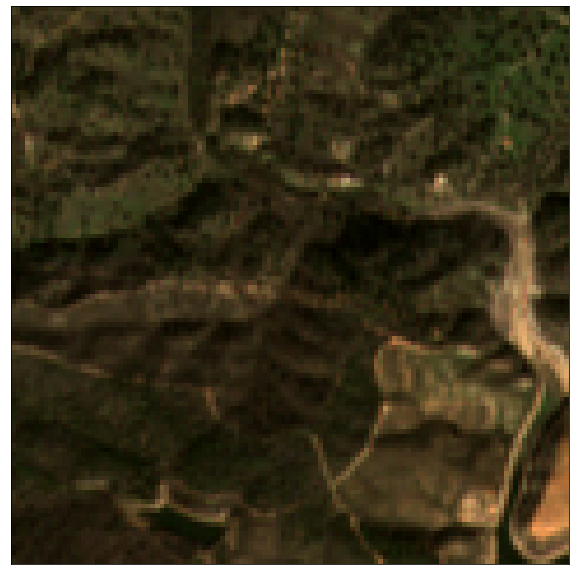

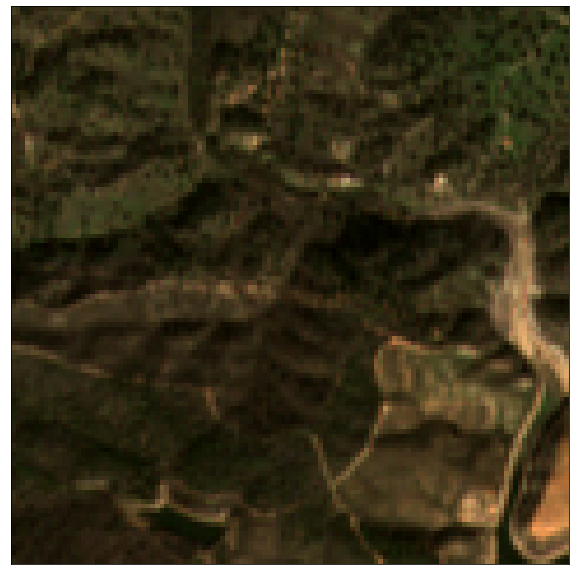

<Figure size 432x288 with 0 Axes>

In [37]:
for i in rdm_array[:1]:
    folder_path = i
    S_sentinel_bands = glob(path+"/"+folder_path+"/*B?*.tif")
    S_sentinel_bands.sort()

    l = []

    print("All the available bands with their shapes: ")

    for i in S_sentinel_bands:
        with rio.open(i, "r") as f:
            l.append(f.read(1))
    for idx, i in enumerate(l):
        if idx+1 < 10:
            print(f"B0{idx+1}: {i.shape}")
        else:
            print(f"B{idx+1}: {i.shape}")

    rgb_l = l[1:4]
    arr_st = np.stack(rgb_l)
    # print(arr_st)
    json_path = glob(path+"/"+folder_path+"/*labels*.json")
    data = json.load(open(json_path[0]))
    print(data)
    rgb = ep.plot_rgb(arr_st, 
                 rgb=(2, 1, 0),
                 figsize=(10, 16))

    rgb = ep.plot_rgb(arr_st, 
                 rgb=(2, 1, 0),
                str_clip=0.2,
                 figsize=(10, 16))
    path2 = "/media/ankith/New Volume/BigEarthNet-S2-v1.0/test/"
#     ep.plt.savefig(path2,i+'.png')
    ep.plt.savefig('test.png')
#     plt.savefig('test.png')
    plt.show()

In [38]:
# !rm test.png
!ls

'Rough Work.ipynb'	     np_array.npy		        test.png
 Test.ipynb		     preprocess_images_till_50K.ipynb
'install everything.ipynb'   rndm_dir.npy


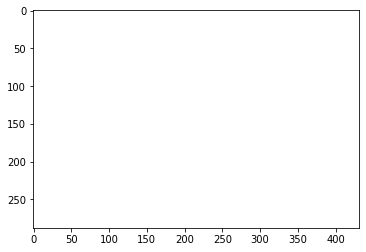

In [39]:
# import required module
import cv2
import matplotlib.pyplot as plt

# read image
image = cv2.imread('test.png')

# call imshow() using plt object
plt.imshow(image)

# display that image
plt.show()


In [13]:
from collections import Counter

# words = ['a', 'b', 'c', 'a']
print(Counter(li).keys()) # equals to list(set(words))
print(Counter(li).values()) # counts the elements' frequency

dict_keys(['Vineyards', 'Olive groves', 'Agro-forestry areas', 'Transitional woodland/shrub', 'Water bodies', 'Discontinuous urban fabric', 'Complex cultivation patterns', 'Land principally occupied by agriculture, with significant areas of natural vegetation', 'Broad-leaved forest', 'Coniferous forest', 'Mixed forest', 'Non-irrigated arable land', 'Industrial or commercial units', 'Pastures', 'Sea and ocean', 'Peatbogs', 'Natural grassland', 'Sclerophyllous vegetation', 'Annual crops associated with permanent crops', 'Water courses', 'Construction sites', 'Permanently irrigated land', 'Continuous urban fabric', 'Moors and heathland', 'Fruit trees and berry plantations', 'Sparsely vegetated areas', 'Sport and leisure facilities', 'Rice fields', 'Mineral extraction sites', 'Inland marshes', 'Road and rail networks and associated land', 'Salt marshes', 'Estuaries', 'Coastal lagoons', 'Intertidal flats', 'Green urban areas', 'Port areas', 'Airports', 'Beaches, dunes, sands', 'Dump sites',


The shape of rgb array is: 
(3, 120, 120)


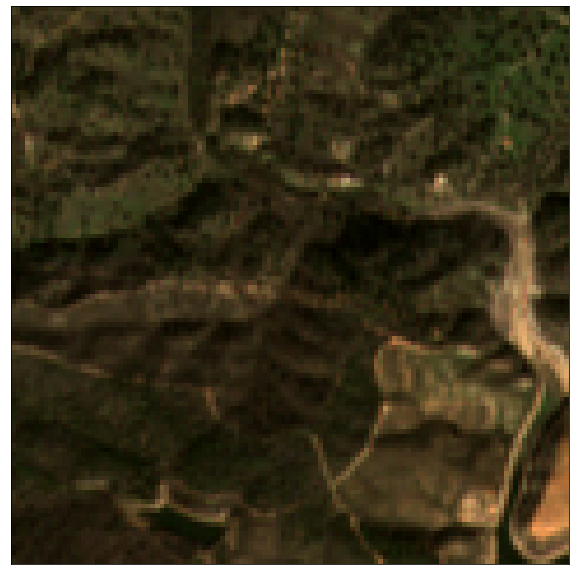

In [14]:
for i in rdm_array[:1]:
    folder_path = i
    S_sentinel_bands = glob(path+"/"+folder_path+"/*B?*.tif")
    S_sentinel_bands.sort()

    l = []

#     print("All the available bands with their shapes: ")

    for i in S_sentinel_bands:
        with rio.open(i, "r") as f:
            l.append(f.read(1))
#     for idx, i in enumerate(l):
#         if idx+1 < 10:
#             print(f"B0{idx+1}: {i.shape}")
#         else:
#             print(f"B{idx+1}: {i.shape}")

    rgb_l = l[1:4]
    arr_st = np.stack(rgb_l)
    print(f"\nThe shape of rgb array is: ")
    print(arr_st.shape)
    arr_st = arr_st/255.
    rgb = ep.plot_rgb(arr_st, 
                 rgb=(2, 1, 0),
                 figsize=(10, 16))

#     arr_st = np.reshape(arr_st,(120,120,3))
#     print(arr_st.shape)
#     rgb = ep.plot_rgb(arr_st, 
#                  rgb=(2, 1, 0),
#                  figsize=(10, 16))

    arr_st = arr_st/255.
#     plt.imshow(arr_st)
    plt.show()

In [58]:
app_l = []
folder_path = rdm_array[0]
S_sentinel_bands = glob(path+"/"+folder_path+"/*B?*.tif")
# print(S_sentinel_bands[3])
S_sentinel_bands.sort()

l = []

for i in S_sentinel_bands:
    with rio.open(i, "r") as f:
        l.append(f.read(1))

rgb_l = l[1:4]
arr_st1 = np.stack(rgb_l)
print(f"\nThe shape of rgb array is: ")
# arr_st1 = np.reshape(arr_st1,(120,120,3))
# print(arr_st.shape)
print(arr_st1.shape)
print(len(app_l))
# print(arr_st1.reshape(1,3,120,120))
# print(arr_st1)
# print(arr_st1.shape)

app_l.append(arr_st1)
for i in rdm_array[1:10000]:
    folder_path = i
    S_sentinel_bands = glob(path+"/"+folder_path+"/*B?*.tif")
    S_sentinel_bands.sort()

    l = []

#     print("All the available bands with their shapes: ")

    for i in S_sentinel_bands:
        with rio.open(i, "r") as f:
            l.append(f.read(1))
#     for idx, i in enumerate(l):
#         if idx+1 < 10:
#             print(f"B0{idx+1}: {i.shape}")
#         else:
#             print(f"B{idx+1}: {i.shape}")

    rgb_l = l[1:4]
    arr_st = np.stack(rgb_l)
#     arr_st1 = np.vstack([arr_st1,arr_st])
    print(f"\nThe shape of rgb array is: ")
#     arr_st1 = np.reshape(arr_st1,(120,120,3))
#     print(arr_st.shape)
    app_l.append(arr_st1)
#     print(arr_st.shape)
    print(arr_st1.shape)
    print(len(app_l))
    


The shape of rgb array is: 
(3, 120, 120)
0

The shape of rgb array is: 
(3, 120, 120)
2

The shape of rgb array is: 
(3, 120, 120)
3

The shape of rgb array is: 
(3, 120, 120)
4

The shape of rgb array is: 
(3, 120, 120)
5

The shape of rgb array is: 
(3, 120, 120)
6

The shape of rgb array is: 
(3, 120, 120)
7

The shape of rgb array is: 
(3, 120, 120)
8

The shape of rgb array is: 
(3, 120, 120)
9

The shape of rgb array is: 
(3, 120, 120)
10

The shape of rgb array is: 
(3, 120, 120)
11

The shape of rgb array is: 
(3, 120, 120)
12

The shape of rgb array is: 
(3, 120, 120)
13

The shape of rgb array is: 
(3, 120, 120)
14

The shape of rgb array is: 
(3, 120, 120)
15

The shape of rgb array is: 
(3, 120, 120)
16

The shape of rgb array is: 
(3, 120, 120)
17

The shape of rgb array is: 
(3, 120, 120)
18

The shape of rgb array is: 
(3, 120, 120)
19

The shape of rgb array is: 
(3, 120, 120)
20

The shape of rgb array is: 
(3, 120, 120)
21

The shape of rgb array is: 
(3, 120, 120)



The shape of rgb array is: 
(3, 120, 120)
186

The shape of rgb array is: 
(3, 120, 120)
187

The shape of rgb array is: 
(3, 120, 120)
188

The shape of rgb array is: 
(3, 120, 120)
189

The shape of rgb array is: 
(3, 120, 120)
190

The shape of rgb array is: 
(3, 120, 120)
191

The shape of rgb array is: 
(3, 120, 120)
192

The shape of rgb array is: 
(3, 120, 120)
193

The shape of rgb array is: 
(3, 120, 120)
194

The shape of rgb array is: 
(3, 120, 120)
195

The shape of rgb array is: 
(3, 120, 120)
196

The shape of rgb array is: 
(3, 120, 120)
197

The shape of rgb array is: 
(3, 120, 120)
198

The shape of rgb array is: 
(3, 120, 120)
199

The shape of rgb array is: 
(3, 120, 120)
200

The shape of rgb array is: 
(3, 120, 120)
201

The shape of rgb array is: 
(3, 120, 120)
202

The shape of rgb array is: 
(3, 120, 120)
203

The shape of rgb array is: 
(3, 120, 120)
204

The shape of rgb array is: 
(3, 120, 120)
205

The shape of rgb array is: 
(3, 120, 120)
206

The shape of


The shape of rgb array is: 
(3, 120, 120)
367

The shape of rgb array is: 
(3, 120, 120)
368

The shape of rgb array is: 
(3, 120, 120)
369

The shape of rgb array is: 
(3, 120, 120)
370

The shape of rgb array is: 
(3, 120, 120)
371

The shape of rgb array is: 
(3, 120, 120)
372

The shape of rgb array is: 
(3, 120, 120)
373

The shape of rgb array is: 
(3, 120, 120)
374

The shape of rgb array is: 
(3, 120, 120)
375

The shape of rgb array is: 
(3, 120, 120)
376

The shape of rgb array is: 
(3, 120, 120)
377

The shape of rgb array is: 
(3, 120, 120)
378

The shape of rgb array is: 
(3, 120, 120)
379

The shape of rgb array is: 
(3, 120, 120)
380

The shape of rgb array is: 
(3, 120, 120)
381

The shape of rgb array is: 
(3, 120, 120)
382

The shape of rgb array is: 
(3, 120, 120)
383

The shape of rgb array is: 
(3, 120, 120)
384

The shape of rgb array is: 
(3, 120, 120)
385

The shape of rgb array is: 
(3, 120, 120)
386

The shape of rgb array is: 
(3, 120, 120)
387

The shape of


The shape of rgb array is: 
(3, 120, 120)
550

The shape of rgb array is: 
(3, 120, 120)
551

The shape of rgb array is: 
(3, 120, 120)
552

The shape of rgb array is: 
(3, 120, 120)
553

The shape of rgb array is: 
(3, 120, 120)
554

The shape of rgb array is: 
(3, 120, 120)
555

The shape of rgb array is: 
(3, 120, 120)
556

The shape of rgb array is: 
(3, 120, 120)
557

The shape of rgb array is: 
(3, 120, 120)
558

The shape of rgb array is: 
(3, 120, 120)
559

The shape of rgb array is: 
(3, 120, 120)
560

The shape of rgb array is: 
(3, 120, 120)
561

The shape of rgb array is: 
(3, 120, 120)
562

The shape of rgb array is: 
(3, 120, 120)
563

The shape of rgb array is: 
(3, 120, 120)
564

The shape of rgb array is: 
(3, 120, 120)
565

The shape of rgb array is: 
(3, 120, 120)
566

The shape of rgb array is: 
(3, 120, 120)
567

The shape of rgb array is: 
(3, 120, 120)
568

The shape of rgb array is: 
(3, 120, 120)
569

The shape of rgb array is: 
(3, 120, 120)
570

The shape of


The shape of rgb array is: 
(3, 120, 120)
734

The shape of rgb array is: 
(3, 120, 120)
735

The shape of rgb array is: 
(3, 120, 120)
736

The shape of rgb array is: 
(3, 120, 120)
737

The shape of rgb array is: 
(3, 120, 120)
738

The shape of rgb array is: 
(3, 120, 120)
739

The shape of rgb array is: 
(3, 120, 120)
740

The shape of rgb array is: 
(3, 120, 120)
741

The shape of rgb array is: 
(3, 120, 120)
742

The shape of rgb array is: 
(3, 120, 120)
743

The shape of rgb array is: 
(3, 120, 120)
744

The shape of rgb array is: 
(3, 120, 120)
745

The shape of rgb array is: 
(3, 120, 120)
746

The shape of rgb array is: 
(3, 120, 120)
747

The shape of rgb array is: 
(3, 120, 120)
748

The shape of rgb array is: 
(3, 120, 120)
749

The shape of rgb array is: 
(3, 120, 120)
750

The shape of rgb array is: 
(3, 120, 120)
751

The shape of rgb array is: 
(3, 120, 120)
752

The shape of rgb array is: 
(3, 120, 120)
753

The shape of rgb array is: 
(3, 120, 120)
754

The shape of


The shape of rgb array is: 
(3, 120, 120)
916

The shape of rgb array is: 
(3, 120, 120)
917

The shape of rgb array is: 
(3, 120, 120)
918

The shape of rgb array is: 
(3, 120, 120)
919

The shape of rgb array is: 
(3, 120, 120)
920

The shape of rgb array is: 
(3, 120, 120)
921

The shape of rgb array is: 
(3, 120, 120)
922

The shape of rgb array is: 
(3, 120, 120)
923

The shape of rgb array is: 
(3, 120, 120)
924

The shape of rgb array is: 
(3, 120, 120)
925

The shape of rgb array is: 
(3, 120, 120)
926

The shape of rgb array is: 
(3, 120, 120)
927

The shape of rgb array is: 
(3, 120, 120)
928

The shape of rgb array is: 
(3, 120, 120)
929

The shape of rgb array is: 
(3, 120, 120)
930

The shape of rgb array is: 
(3, 120, 120)
931

The shape of rgb array is: 
(3, 120, 120)
932

The shape of rgb array is: 
(3, 120, 120)
933

The shape of rgb array is: 
(3, 120, 120)
934

The shape of rgb array is: 
(3, 120, 120)
935

The shape of rgb array is: 
(3, 120, 120)
936

The shape of


The shape of rgb array is: 
(3, 120, 120)
1098

The shape of rgb array is: 
(3, 120, 120)
1099

The shape of rgb array is: 
(3, 120, 120)
1100

The shape of rgb array is: 
(3, 120, 120)
1101

The shape of rgb array is: 
(3, 120, 120)
1102

The shape of rgb array is: 
(3, 120, 120)
1103

The shape of rgb array is: 
(3, 120, 120)
1104

The shape of rgb array is: 
(3, 120, 120)
1105

The shape of rgb array is: 
(3, 120, 120)
1106

The shape of rgb array is: 
(3, 120, 120)
1107

The shape of rgb array is: 
(3, 120, 120)
1108

The shape of rgb array is: 
(3, 120, 120)
1109

The shape of rgb array is: 
(3, 120, 120)
1110

The shape of rgb array is: 
(3, 120, 120)
1111

The shape of rgb array is: 
(3, 120, 120)
1112

The shape of rgb array is: 
(3, 120, 120)
1113

The shape of rgb array is: 
(3, 120, 120)
1114

The shape of rgb array is: 
(3, 120, 120)
1115

The shape of rgb array is: 
(3, 120, 120)
1116

The shape of rgb array is: 
(3, 120, 120)
1117

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
1280

The shape of rgb array is: 
(3, 120, 120)
1281

The shape of rgb array is: 
(3, 120, 120)
1282

The shape of rgb array is: 
(3, 120, 120)
1283

The shape of rgb array is: 
(3, 120, 120)
1284

The shape of rgb array is: 
(3, 120, 120)
1285

The shape of rgb array is: 
(3, 120, 120)
1286

The shape of rgb array is: 
(3, 120, 120)
1287

The shape of rgb array is: 
(3, 120, 120)
1288

The shape of rgb array is: 
(3, 120, 120)
1289

The shape of rgb array is: 
(3, 120, 120)
1290

The shape of rgb array is: 
(3, 120, 120)
1291

The shape of rgb array is: 
(3, 120, 120)
1292

The shape of rgb array is: 
(3, 120, 120)
1293

The shape of rgb array is: 
(3, 120, 120)
1294

The shape of rgb array is: 
(3, 120, 120)
1295

The shape of rgb array is: 
(3, 120, 120)
1296

The shape of rgb array is: 
(3, 120, 120)
1297

The shape of rgb array is: 
(3, 120, 120)
1298

The shape of rgb array is: 
(3, 120, 120)
1299

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
1462

The shape of rgb array is: 
(3, 120, 120)
1463

The shape of rgb array is: 
(3, 120, 120)
1464

The shape of rgb array is: 
(3, 120, 120)
1465

The shape of rgb array is: 
(3, 120, 120)
1466

The shape of rgb array is: 
(3, 120, 120)
1467

The shape of rgb array is: 
(3, 120, 120)
1468

The shape of rgb array is: 
(3, 120, 120)
1469

The shape of rgb array is: 
(3, 120, 120)
1470

The shape of rgb array is: 
(3, 120, 120)
1471

The shape of rgb array is: 
(3, 120, 120)
1472

The shape of rgb array is: 
(3, 120, 120)
1473

The shape of rgb array is: 
(3, 120, 120)
1474

The shape of rgb array is: 
(3, 120, 120)
1475

The shape of rgb array is: 
(3, 120, 120)
1476

The shape of rgb array is: 
(3, 120, 120)
1477

The shape of rgb array is: 
(3, 120, 120)
1478

The shape of rgb array is: 
(3, 120, 120)
1479

The shape of rgb array is: 
(3, 120, 120)
1480

The shape of rgb array is: 
(3, 120, 120)
1481

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
1643

The shape of rgb array is: 
(3, 120, 120)
1644

The shape of rgb array is: 
(3, 120, 120)
1645

The shape of rgb array is: 
(3, 120, 120)
1646

The shape of rgb array is: 
(3, 120, 120)
1647

The shape of rgb array is: 
(3, 120, 120)
1648

The shape of rgb array is: 
(3, 120, 120)
1649

The shape of rgb array is: 
(3, 120, 120)
1650

The shape of rgb array is: 
(3, 120, 120)
1651

The shape of rgb array is: 
(3, 120, 120)
1652

The shape of rgb array is: 
(3, 120, 120)
1653

The shape of rgb array is: 
(3, 120, 120)
1654

The shape of rgb array is: 
(3, 120, 120)
1655

The shape of rgb array is: 
(3, 120, 120)
1656

The shape of rgb array is: 
(3, 120, 120)
1657

The shape of rgb array is: 
(3, 120, 120)
1658

The shape of rgb array is: 
(3, 120, 120)
1659

The shape of rgb array is: 
(3, 120, 120)
1660

The shape of rgb array is: 
(3, 120, 120)
1661

The shape of rgb array is: 
(3, 120, 120)
1662

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
1823

The shape of rgb array is: 
(3, 120, 120)
1824

The shape of rgb array is: 
(3, 120, 120)
1825

The shape of rgb array is: 
(3, 120, 120)
1826

The shape of rgb array is: 
(3, 120, 120)
1827

The shape of rgb array is: 
(3, 120, 120)
1828

The shape of rgb array is: 
(3, 120, 120)
1829

The shape of rgb array is: 
(3, 120, 120)
1830

The shape of rgb array is: 
(3, 120, 120)
1831

The shape of rgb array is: 
(3, 120, 120)
1832

The shape of rgb array is: 
(3, 120, 120)
1833

The shape of rgb array is: 
(3, 120, 120)
1834

The shape of rgb array is: 
(3, 120, 120)
1835

The shape of rgb array is: 
(3, 120, 120)
1836

The shape of rgb array is: 
(3, 120, 120)
1837

The shape of rgb array is: 
(3, 120, 120)
1838

The shape of rgb array is: 
(3, 120, 120)
1839

The shape of rgb array is: 
(3, 120, 120)
1840

The shape of rgb array is: 
(3, 120, 120)
1841

The shape of rgb array is: 
(3, 120, 120)
1842

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
1995

The shape of rgb array is: 
(3, 120, 120)
1996

The shape of rgb array is: 
(3, 120, 120)
1997

The shape of rgb array is: 
(3, 120, 120)
1998

The shape of rgb array is: 
(3, 120, 120)
1999

The shape of rgb array is: 
(3, 120, 120)
2000

The shape of rgb array is: 
(3, 120, 120)
2001

The shape of rgb array is: 
(3, 120, 120)
2002

The shape of rgb array is: 
(3, 120, 120)
2003

The shape of rgb array is: 
(3, 120, 120)
2004

The shape of rgb array is: 
(3, 120, 120)
2005

The shape of rgb array is: 
(3, 120, 120)
2006

The shape of rgb array is: 
(3, 120, 120)
2007

The shape of rgb array is: 
(3, 120, 120)
2008

The shape of rgb array is: 
(3, 120, 120)
2009

The shape of rgb array is: 
(3, 120, 120)
2010

The shape of rgb array is: 
(3, 120, 120)
2011

The shape of rgb array is: 
(3, 120, 120)
2012

The shape of rgb array is: 
(3, 120, 120)
2013

The shape of rgb array is: 
(3, 120, 120)
2014

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
2170

The shape of rgb array is: 
(3, 120, 120)
2171

The shape of rgb array is: 
(3, 120, 120)
2172

The shape of rgb array is: 
(3, 120, 120)
2173

The shape of rgb array is: 
(3, 120, 120)
2174

The shape of rgb array is: 
(3, 120, 120)
2175

The shape of rgb array is: 
(3, 120, 120)
2176

The shape of rgb array is: 
(3, 120, 120)
2177

The shape of rgb array is: 
(3, 120, 120)
2178

The shape of rgb array is: 
(3, 120, 120)
2179

The shape of rgb array is: 
(3, 120, 120)
2180

The shape of rgb array is: 
(3, 120, 120)
2181

The shape of rgb array is: 
(3, 120, 120)
2182

The shape of rgb array is: 
(3, 120, 120)
2183

The shape of rgb array is: 
(3, 120, 120)
2184

The shape of rgb array is: 
(3, 120, 120)
2185

The shape of rgb array is: 
(3, 120, 120)
2186

The shape of rgb array is: 
(3, 120, 120)
2187

The shape of rgb array is: 
(3, 120, 120)
2188

The shape of rgb array is: 
(3, 120, 120)
2189

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
2350

The shape of rgb array is: 
(3, 120, 120)
2351

The shape of rgb array is: 
(3, 120, 120)
2352

The shape of rgb array is: 
(3, 120, 120)
2353

The shape of rgb array is: 
(3, 120, 120)
2354

The shape of rgb array is: 
(3, 120, 120)
2355

The shape of rgb array is: 
(3, 120, 120)
2356

The shape of rgb array is: 
(3, 120, 120)
2357

The shape of rgb array is: 
(3, 120, 120)
2358

The shape of rgb array is: 
(3, 120, 120)
2359

The shape of rgb array is: 
(3, 120, 120)
2360

The shape of rgb array is: 
(3, 120, 120)
2361

The shape of rgb array is: 
(3, 120, 120)
2362

The shape of rgb array is: 
(3, 120, 120)
2363

The shape of rgb array is: 
(3, 120, 120)
2364

The shape of rgb array is: 
(3, 120, 120)
2365

The shape of rgb array is: 
(3, 120, 120)
2366

The shape of rgb array is: 
(3, 120, 120)
2367

The shape of rgb array is: 
(3, 120, 120)
2368

The shape of rgb array is: 
(3, 120, 120)
2369

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
2522

The shape of rgb array is: 
(3, 120, 120)
2523

The shape of rgb array is: 
(3, 120, 120)
2524

The shape of rgb array is: 
(3, 120, 120)
2525

The shape of rgb array is: 
(3, 120, 120)
2526

The shape of rgb array is: 
(3, 120, 120)
2527

The shape of rgb array is: 
(3, 120, 120)
2528

The shape of rgb array is: 
(3, 120, 120)
2529

The shape of rgb array is: 
(3, 120, 120)
2530

The shape of rgb array is: 
(3, 120, 120)
2531

The shape of rgb array is: 
(3, 120, 120)
2532

The shape of rgb array is: 
(3, 120, 120)
2533

The shape of rgb array is: 
(3, 120, 120)
2534

The shape of rgb array is: 
(3, 120, 120)
2535

The shape of rgb array is: 
(3, 120, 120)
2536

The shape of rgb array is: 
(3, 120, 120)
2537

The shape of rgb array is: 
(3, 120, 120)
2538

The shape of rgb array is: 
(3, 120, 120)
2539

The shape of rgb array is: 
(3, 120, 120)
2540

The shape of rgb array is: 
(3, 120, 120)
2541

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
2704

The shape of rgb array is: 
(3, 120, 120)
2705

The shape of rgb array is: 
(3, 120, 120)
2706

The shape of rgb array is: 
(3, 120, 120)
2707

The shape of rgb array is: 
(3, 120, 120)
2708

The shape of rgb array is: 
(3, 120, 120)
2709

The shape of rgb array is: 
(3, 120, 120)
2710

The shape of rgb array is: 
(3, 120, 120)
2711

The shape of rgb array is: 
(3, 120, 120)
2712

The shape of rgb array is: 
(3, 120, 120)
2713

The shape of rgb array is: 
(3, 120, 120)
2714

The shape of rgb array is: 
(3, 120, 120)
2715

The shape of rgb array is: 
(3, 120, 120)
2716

The shape of rgb array is: 
(3, 120, 120)
2717

The shape of rgb array is: 
(3, 120, 120)
2718

The shape of rgb array is: 
(3, 120, 120)
2719

The shape of rgb array is: 
(3, 120, 120)
2720

The shape of rgb array is: 
(3, 120, 120)
2721

The shape of rgb array is: 
(3, 120, 120)
2722

The shape of rgb array is: 
(3, 120, 120)
2723

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
2885

The shape of rgb array is: 
(3, 120, 120)
2886

The shape of rgb array is: 
(3, 120, 120)
2887

The shape of rgb array is: 
(3, 120, 120)
2888

The shape of rgb array is: 
(3, 120, 120)
2889

The shape of rgb array is: 
(3, 120, 120)
2890

The shape of rgb array is: 
(3, 120, 120)
2891

The shape of rgb array is: 
(3, 120, 120)
2892

The shape of rgb array is: 
(3, 120, 120)
2893

The shape of rgb array is: 
(3, 120, 120)
2894

The shape of rgb array is: 
(3, 120, 120)
2895

The shape of rgb array is: 
(3, 120, 120)
2896

The shape of rgb array is: 
(3, 120, 120)
2897

The shape of rgb array is: 
(3, 120, 120)
2898

The shape of rgb array is: 
(3, 120, 120)
2899

The shape of rgb array is: 
(3, 120, 120)
2900

The shape of rgb array is: 
(3, 120, 120)
2901

The shape of rgb array is: 
(3, 120, 120)
2902

The shape of rgb array is: 
(3, 120, 120)
2903

The shape of rgb array is: 
(3, 120, 120)
2904

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
3065

The shape of rgb array is: 
(3, 120, 120)
3066

The shape of rgb array is: 
(3, 120, 120)
3067

The shape of rgb array is: 
(3, 120, 120)
3068

The shape of rgb array is: 
(3, 120, 120)
3069

The shape of rgb array is: 
(3, 120, 120)
3070

The shape of rgb array is: 
(3, 120, 120)
3071

The shape of rgb array is: 
(3, 120, 120)
3072

The shape of rgb array is: 
(3, 120, 120)
3073

The shape of rgb array is: 
(3, 120, 120)
3074

The shape of rgb array is: 
(3, 120, 120)
3075

The shape of rgb array is: 
(3, 120, 120)
3076

The shape of rgb array is: 
(3, 120, 120)
3077

The shape of rgb array is: 
(3, 120, 120)
3078

The shape of rgb array is: 
(3, 120, 120)
3079

The shape of rgb array is: 
(3, 120, 120)
3080

The shape of rgb array is: 
(3, 120, 120)
3081

The shape of rgb array is: 
(3, 120, 120)
3082

The shape of rgb array is: 
(3, 120, 120)
3083

The shape of rgb array is: 
(3, 120, 120)
3084

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
3247

The shape of rgb array is: 
(3, 120, 120)
3248

The shape of rgb array is: 
(3, 120, 120)
3249

The shape of rgb array is: 
(3, 120, 120)
3250

The shape of rgb array is: 
(3, 120, 120)
3251

The shape of rgb array is: 
(3, 120, 120)
3252

The shape of rgb array is: 
(3, 120, 120)
3253

The shape of rgb array is: 
(3, 120, 120)
3254

The shape of rgb array is: 
(3, 120, 120)
3255

The shape of rgb array is: 
(3, 120, 120)
3256

The shape of rgb array is: 
(3, 120, 120)
3257

The shape of rgb array is: 
(3, 120, 120)
3258

The shape of rgb array is: 
(3, 120, 120)
3259

The shape of rgb array is: 
(3, 120, 120)
3260

The shape of rgb array is: 
(3, 120, 120)
3261

The shape of rgb array is: 
(3, 120, 120)
3262

The shape of rgb array is: 
(3, 120, 120)
3263

The shape of rgb array is: 
(3, 120, 120)
3264

The shape of rgb array is: 
(3, 120, 120)
3265

The shape of rgb array is: 
(3, 120, 120)
3266

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
3427

The shape of rgb array is: 
(3, 120, 120)
3428

The shape of rgb array is: 
(3, 120, 120)
3429

The shape of rgb array is: 
(3, 120, 120)
3430

The shape of rgb array is: 
(3, 120, 120)
3431

The shape of rgb array is: 
(3, 120, 120)
3432

The shape of rgb array is: 
(3, 120, 120)
3433

The shape of rgb array is: 
(3, 120, 120)
3434

The shape of rgb array is: 
(3, 120, 120)
3435

The shape of rgb array is: 
(3, 120, 120)
3436

The shape of rgb array is: 
(3, 120, 120)
3437

The shape of rgb array is: 
(3, 120, 120)
3438

The shape of rgb array is: 
(3, 120, 120)
3439

The shape of rgb array is: 
(3, 120, 120)
3440

The shape of rgb array is: 
(3, 120, 120)
3441

The shape of rgb array is: 
(3, 120, 120)
3442

The shape of rgb array is: 
(3, 120, 120)
3443

The shape of rgb array is: 
(3, 120, 120)
3444

The shape of rgb array is: 
(3, 120, 120)
3445

The shape of rgb array is: 
(3, 120, 120)
3446

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
3608

The shape of rgb array is: 
(3, 120, 120)
3609

The shape of rgb array is: 
(3, 120, 120)
3610

The shape of rgb array is: 
(3, 120, 120)
3611

The shape of rgb array is: 
(3, 120, 120)
3612

The shape of rgb array is: 
(3, 120, 120)
3613

The shape of rgb array is: 
(3, 120, 120)
3614

The shape of rgb array is: 
(3, 120, 120)
3615

The shape of rgb array is: 
(3, 120, 120)
3616

The shape of rgb array is: 
(3, 120, 120)
3617

The shape of rgb array is: 
(3, 120, 120)
3618

The shape of rgb array is: 
(3, 120, 120)
3619

The shape of rgb array is: 
(3, 120, 120)
3620

The shape of rgb array is: 
(3, 120, 120)
3621

The shape of rgb array is: 
(3, 120, 120)
3622

The shape of rgb array is: 
(3, 120, 120)
3623

The shape of rgb array is: 
(3, 120, 120)
3624

The shape of rgb array is: 
(3, 120, 120)
3625

The shape of rgb array is: 
(3, 120, 120)
3626

The shape of rgb array is: 
(3, 120, 120)
3627

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
3785

The shape of rgb array is: 
(3, 120, 120)
3786

The shape of rgb array is: 
(3, 120, 120)
3787

The shape of rgb array is: 
(3, 120, 120)
3788

The shape of rgb array is: 
(3, 120, 120)
3789

The shape of rgb array is: 
(3, 120, 120)
3790

The shape of rgb array is: 
(3, 120, 120)
3791

The shape of rgb array is: 
(3, 120, 120)
3792

The shape of rgb array is: 
(3, 120, 120)
3793

The shape of rgb array is: 
(3, 120, 120)
3794

The shape of rgb array is: 
(3, 120, 120)
3795

The shape of rgb array is: 
(3, 120, 120)
3796

The shape of rgb array is: 
(3, 120, 120)
3797

The shape of rgb array is: 
(3, 120, 120)
3798

The shape of rgb array is: 
(3, 120, 120)
3799

The shape of rgb array is: 
(3, 120, 120)
3800

The shape of rgb array is: 
(3, 120, 120)
3801

The shape of rgb array is: 
(3, 120, 120)
3802

The shape of rgb array is: 
(3, 120, 120)
3803

The shape of rgb array is: 
(3, 120, 120)
3804

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
3964

The shape of rgb array is: 
(3, 120, 120)
3965

The shape of rgb array is: 
(3, 120, 120)
3966

The shape of rgb array is: 
(3, 120, 120)
3967

The shape of rgb array is: 
(3, 120, 120)
3968

The shape of rgb array is: 
(3, 120, 120)
3969

The shape of rgb array is: 
(3, 120, 120)
3970

The shape of rgb array is: 
(3, 120, 120)
3971

The shape of rgb array is: 
(3, 120, 120)
3972

The shape of rgb array is: 
(3, 120, 120)
3973

The shape of rgb array is: 
(3, 120, 120)
3974

The shape of rgb array is: 
(3, 120, 120)
3975

The shape of rgb array is: 
(3, 120, 120)
3976

The shape of rgb array is: 
(3, 120, 120)
3977

The shape of rgb array is: 
(3, 120, 120)
3978

The shape of rgb array is: 
(3, 120, 120)
3979

The shape of rgb array is: 
(3, 120, 120)
3980

The shape of rgb array is: 
(3, 120, 120)
3981

The shape of rgb array is: 
(3, 120, 120)
3982

The shape of rgb array is: 
(3, 120, 120)
3983

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
4144

The shape of rgb array is: 
(3, 120, 120)
4145

The shape of rgb array is: 
(3, 120, 120)
4146

The shape of rgb array is: 
(3, 120, 120)
4147

The shape of rgb array is: 
(3, 120, 120)
4148

The shape of rgb array is: 
(3, 120, 120)
4149

The shape of rgb array is: 
(3, 120, 120)
4150

The shape of rgb array is: 
(3, 120, 120)
4151

The shape of rgb array is: 
(3, 120, 120)
4152

The shape of rgb array is: 
(3, 120, 120)
4153

The shape of rgb array is: 
(3, 120, 120)
4154

The shape of rgb array is: 
(3, 120, 120)
4155

The shape of rgb array is: 
(3, 120, 120)
4156

The shape of rgb array is: 
(3, 120, 120)
4157

The shape of rgb array is: 
(3, 120, 120)
4158

The shape of rgb array is: 
(3, 120, 120)
4159

The shape of rgb array is: 
(3, 120, 120)
4160

The shape of rgb array is: 
(3, 120, 120)
4161

The shape of rgb array is: 
(3, 120, 120)
4162

The shape of rgb array is: 
(3, 120, 120)
4163

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
4325

The shape of rgb array is: 
(3, 120, 120)
4326

The shape of rgb array is: 
(3, 120, 120)
4327

The shape of rgb array is: 
(3, 120, 120)
4328

The shape of rgb array is: 
(3, 120, 120)
4329

The shape of rgb array is: 
(3, 120, 120)
4330

The shape of rgb array is: 
(3, 120, 120)
4331

The shape of rgb array is: 
(3, 120, 120)
4332

The shape of rgb array is: 
(3, 120, 120)
4333

The shape of rgb array is: 
(3, 120, 120)
4334

The shape of rgb array is: 
(3, 120, 120)
4335

The shape of rgb array is: 
(3, 120, 120)
4336

The shape of rgb array is: 
(3, 120, 120)
4337

The shape of rgb array is: 
(3, 120, 120)
4338

The shape of rgb array is: 
(3, 120, 120)
4339

The shape of rgb array is: 
(3, 120, 120)
4340

The shape of rgb array is: 
(3, 120, 120)
4341

The shape of rgb array is: 
(3, 120, 120)
4342

The shape of rgb array is: 
(3, 120, 120)
4343

The shape of rgb array is: 
(3, 120, 120)
4344

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
4499

The shape of rgb array is: 
(3, 120, 120)
4500

The shape of rgb array is: 
(3, 120, 120)
4501

The shape of rgb array is: 
(3, 120, 120)
4502

The shape of rgb array is: 
(3, 120, 120)
4503

The shape of rgb array is: 
(3, 120, 120)
4504

The shape of rgb array is: 
(3, 120, 120)
4505

The shape of rgb array is: 
(3, 120, 120)
4506

The shape of rgb array is: 
(3, 120, 120)
4507

The shape of rgb array is: 
(3, 120, 120)
4508

The shape of rgb array is: 
(3, 120, 120)
4509

The shape of rgb array is: 
(3, 120, 120)
4510

The shape of rgb array is: 
(3, 120, 120)
4511

The shape of rgb array is: 
(3, 120, 120)
4512

The shape of rgb array is: 
(3, 120, 120)
4513

The shape of rgb array is: 
(3, 120, 120)
4514

The shape of rgb array is: 
(3, 120, 120)
4515

The shape of rgb array is: 
(3, 120, 120)
4516

The shape of rgb array is: 
(3, 120, 120)
4517

The shape of rgb array is: 
(3, 120, 120)
4518

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
4671

The shape of rgb array is: 
(3, 120, 120)
4672

The shape of rgb array is: 
(3, 120, 120)
4673

The shape of rgb array is: 
(3, 120, 120)
4674

The shape of rgb array is: 
(3, 120, 120)
4675

The shape of rgb array is: 
(3, 120, 120)
4676

The shape of rgb array is: 
(3, 120, 120)
4677

The shape of rgb array is: 
(3, 120, 120)
4678

The shape of rgb array is: 
(3, 120, 120)
4679

The shape of rgb array is: 
(3, 120, 120)
4680

The shape of rgb array is: 
(3, 120, 120)
4681

The shape of rgb array is: 
(3, 120, 120)
4682

The shape of rgb array is: 
(3, 120, 120)
4683

The shape of rgb array is: 
(3, 120, 120)
4684

The shape of rgb array is: 
(3, 120, 120)
4685

The shape of rgb array is: 
(3, 120, 120)
4686

The shape of rgb array is: 
(3, 120, 120)
4687

The shape of rgb array is: 
(3, 120, 120)
4688

The shape of rgb array is: 
(3, 120, 120)
4689

The shape of rgb array is: 
(3, 120, 120)
4690

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
4852

The shape of rgb array is: 
(3, 120, 120)
4853

The shape of rgb array is: 
(3, 120, 120)
4854

The shape of rgb array is: 
(3, 120, 120)
4855

The shape of rgb array is: 
(3, 120, 120)
4856

The shape of rgb array is: 
(3, 120, 120)
4857

The shape of rgb array is: 
(3, 120, 120)
4858

The shape of rgb array is: 
(3, 120, 120)
4859

The shape of rgb array is: 
(3, 120, 120)
4860

The shape of rgb array is: 
(3, 120, 120)
4861

The shape of rgb array is: 
(3, 120, 120)
4862

The shape of rgb array is: 
(3, 120, 120)
4863

The shape of rgb array is: 
(3, 120, 120)
4864

The shape of rgb array is: 
(3, 120, 120)
4865

The shape of rgb array is: 
(3, 120, 120)
4866

The shape of rgb array is: 
(3, 120, 120)
4867

The shape of rgb array is: 
(3, 120, 120)
4868

The shape of rgb array is: 
(3, 120, 120)
4869

The shape of rgb array is: 
(3, 120, 120)
4870

The shape of rgb array is: 
(3, 120, 120)
4871

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
5028

The shape of rgb array is: 
(3, 120, 120)
5029

The shape of rgb array is: 
(3, 120, 120)
5030

The shape of rgb array is: 
(3, 120, 120)
5031

The shape of rgb array is: 
(3, 120, 120)
5032

The shape of rgb array is: 
(3, 120, 120)
5033

The shape of rgb array is: 
(3, 120, 120)
5034

The shape of rgb array is: 
(3, 120, 120)
5035

The shape of rgb array is: 
(3, 120, 120)
5036

The shape of rgb array is: 
(3, 120, 120)
5037

The shape of rgb array is: 
(3, 120, 120)
5038

The shape of rgb array is: 
(3, 120, 120)
5039

The shape of rgb array is: 
(3, 120, 120)
5040

The shape of rgb array is: 
(3, 120, 120)
5041

The shape of rgb array is: 
(3, 120, 120)
5042

The shape of rgb array is: 
(3, 120, 120)
5043

The shape of rgb array is: 
(3, 120, 120)
5044

The shape of rgb array is: 
(3, 120, 120)
5045

The shape of rgb array is: 
(3, 120, 120)
5046

The shape of rgb array is: 
(3, 120, 120)
5047

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
5200

The shape of rgb array is: 
(3, 120, 120)
5201

The shape of rgb array is: 
(3, 120, 120)
5202

The shape of rgb array is: 
(3, 120, 120)
5203

The shape of rgb array is: 
(3, 120, 120)
5204

The shape of rgb array is: 
(3, 120, 120)
5205

The shape of rgb array is: 
(3, 120, 120)
5206

The shape of rgb array is: 
(3, 120, 120)
5207

The shape of rgb array is: 
(3, 120, 120)
5208

The shape of rgb array is: 
(3, 120, 120)
5209

The shape of rgb array is: 
(3, 120, 120)
5210

The shape of rgb array is: 
(3, 120, 120)
5211

The shape of rgb array is: 
(3, 120, 120)
5212

The shape of rgb array is: 
(3, 120, 120)
5213

The shape of rgb array is: 
(3, 120, 120)
5214

The shape of rgb array is: 
(3, 120, 120)
5215

The shape of rgb array is: 
(3, 120, 120)
5216

The shape of rgb array is: 
(3, 120, 120)
5217

The shape of rgb array is: 
(3, 120, 120)
5218

The shape of rgb array is: 
(3, 120, 120)
5219

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
5375

The shape of rgb array is: 
(3, 120, 120)
5376

The shape of rgb array is: 
(3, 120, 120)
5377

The shape of rgb array is: 
(3, 120, 120)
5378

The shape of rgb array is: 
(3, 120, 120)
5379

The shape of rgb array is: 
(3, 120, 120)
5380

The shape of rgb array is: 
(3, 120, 120)
5381

The shape of rgb array is: 
(3, 120, 120)
5382

The shape of rgb array is: 
(3, 120, 120)
5383

The shape of rgb array is: 
(3, 120, 120)
5384

The shape of rgb array is: 
(3, 120, 120)
5385

The shape of rgb array is: 
(3, 120, 120)
5386

The shape of rgb array is: 
(3, 120, 120)
5387

The shape of rgb array is: 
(3, 120, 120)
5388

The shape of rgb array is: 
(3, 120, 120)
5389

The shape of rgb array is: 
(3, 120, 120)
5390

The shape of rgb array is: 
(3, 120, 120)
5391

The shape of rgb array is: 
(3, 120, 120)
5392

The shape of rgb array is: 
(3, 120, 120)
5393

The shape of rgb array is: 
(3, 120, 120)
5394

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
5548

The shape of rgb array is: 
(3, 120, 120)
5549

The shape of rgb array is: 
(3, 120, 120)
5550

The shape of rgb array is: 
(3, 120, 120)
5551

The shape of rgb array is: 
(3, 120, 120)
5552

The shape of rgb array is: 
(3, 120, 120)
5553

The shape of rgb array is: 
(3, 120, 120)
5554

The shape of rgb array is: 
(3, 120, 120)
5555

The shape of rgb array is: 
(3, 120, 120)
5556

The shape of rgb array is: 
(3, 120, 120)
5557

The shape of rgb array is: 
(3, 120, 120)
5558

The shape of rgb array is: 
(3, 120, 120)
5559

The shape of rgb array is: 
(3, 120, 120)
5560

The shape of rgb array is: 
(3, 120, 120)
5561

The shape of rgb array is: 
(3, 120, 120)
5562

The shape of rgb array is: 
(3, 120, 120)
5563

The shape of rgb array is: 
(3, 120, 120)
5564

The shape of rgb array is: 
(3, 120, 120)
5565

The shape of rgb array is: 
(3, 120, 120)
5566

The shape of rgb array is: 
(3, 120, 120)
5567

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
5721

The shape of rgb array is: 
(3, 120, 120)
5722

The shape of rgb array is: 
(3, 120, 120)
5723

The shape of rgb array is: 
(3, 120, 120)
5724

The shape of rgb array is: 
(3, 120, 120)
5725

The shape of rgb array is: 
(3, 120, 120)
5726

The shape of rgb array is: 
(3, 120, 120)
5727

The shape of rgb array is: 
(3, 120, 120)
5728

The shape of rgb array is: 
(3, 120, 120)
5729

The shape of rgb array is: 
(3, 120, 120)
5730

The shape of rgb array is: 
(3, 120, 120)
5731

The shape of rgb array is: 
(3, 120, 120)
5732

The shape of rgb array is: 
(3, 120, 120)
5733

The shape of rgb array is: 
(3, 120, 120)
5734

The shape of rgb array is: 
(3, 120, 120)
5735

The shape of rgb array is: 
(3, 120, 120)
5736

The shape of rgb array is: 
(3, 120, 120)
5737

The shape of rgb array is: 
(3, 120, 120)
5738

The shape of rgb array is: 
(3, 120, 120)
5739

The shape of rgb array is: 
(3, 120, 120)
5740

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
5896

The shape of rgb array is: 
(3, 120, 120)
5897

The shape of rgb array is: 
(3, 120, 120)
5898

The shape of rgb array is: 
(3, 120, 120)
5899

The shape of rgb array is: 
(3, 120, 120)
5900

The shape of rgb array is: 
(3, 120, 120)
5901

The shape of rgb array is: 
(3, 120, 120)
5902

The shape of rgb array is: 
(3, 120, 120)
5903

The shape of rgb array is: 
(3, 120, 120)
5904

The shape of rgb array is: 
(3, 120, 120)
5905

The shape of rgb array is: 
(3, 120, 120)
5906

The shape of rgb array is: 
(3, 120, 120)
5907

The shape of rgb array is: 
(3, 120, 120)
5908

The shape of rgb array is: 
(3, 120, 120)
5909

The shape of rgb array is: 
(3, 120, 120)
5910

The shape of rgb array is: 
(3, 120, 120)
5911

The shape of rgb array is: 
(3, 120, 120)
5912

The shape of rgb array is: 
(3, 120, 120)
5913

The shape of rgb array is: 
(3, 120, 120)
5914

The shape of rgb array is: 
(3, 120, 120)
5915

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
6070

The shape of rgb array is: 
(3, 120, 120)
6071

The shape of rgb array is: 
(3, 120, 120)
6072

The shape of rgb array is: 
(3, 120, 120)
6073

The shape of rgb array is: 
(3, 120, 120)
6074

The shape of rgb array is: 
(3, 120, 120)
6075

The shape of rgb array is: 
(3, 120, 120)
6076

The shape of rgb array is: 
(3, 120, 120)
6077

The shape of rgb array is: 
(3, 120, 120)
6078

The shape of rgb array is: 
(3, 120, 120)
6079

The shape of rgb array is: 
(3, 120, 120)
6080

The shape of rgb array is: 
(3, 120, 120)
6081

The shape of rgb array is: 
(3, 120, 120)
6082

The shape of rgb array is: 
(3, 120, 120)
6083

The shape of rgb array is: 
(3, 120, 120)
6084

The shape of rgb array is: 
(3, 120, 120)
6085

The shape of rgb array is: 
(3, 120, 120)
6086

The shape of rgb array is: 
(3, 120, 120)
6087

The shape of rgb array is: 
(3, 120, 120)
6088

The shape of rgb array is: 
(3, 120, 120)
6089

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
6251

The shape of rgb array is: 
(3, 120, 120)
6252

The shape of rgb array is: 
(3, 120, 120)
6253

The shape of rgb array is: 
(3, 120, 120)
6254

The shape of rgb array is: 
(3, 120, 120)
6255

The shape of rgb array is: 
(3, 120, 120)
6256

The shape of rgb array is: 
(3, 120, 120)
6257

The shape of rgb array is: 
(3, 120, 120)
6258

The shape of rgb array is: 
(3, 120, 120)
6259

The shape of rgb array is: 
(3, 120, 120)
6260

The shape of rgb array is: 
(3, 120, 120)
6261

The shape of rgb array is: 
(3, 120, 120)
6262

The shape of rgb array is: 
(3, 120, 120)
6263

The shape of rgb array is: 
(3, 120, 120)
6264

The shape of rgb array is: 
(3, 120, 120)
6265

The shape of rgb array is: 
(3, 120, 120)
6266

The shape of rgb array is: 
(3, 120, 120)
6267

The shape of rgb array is: 
(3, 120, 120)
6268

The shape of rgb array is: 
(3, 120, 120)
6269

The shape of rgb array is: 
(3, 120, 120)
6270

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
6424

The shape of rgb array is: 
(3, 120, 120)
6425

The shape of rgb array is: 
(3, 120, 120)
6426

The shape of rgb array is: 
(3, 120, 120)
6427

The shape of rgb array is: 
(3, 120, 120)
6428

The shape of rgb array is: 
(3, 120, 120)
6429

The shape of rgb array is: 
(3, 120, 120)
6430

The shape of rgb array is: 
(3, 120, 120)
6431

The shape of rgb array is: 
(3, 120, 120)
6432

The shape of rgb array is: 
(3, 120, 120)
6433

The shape of rgb array is: 
(3, 120, 120)
6434

The shape of rgb array is: 
(3, 120, 120)
6435

The shape of rgb array is: 
(3, 120, 120)
6436

The shape of rgb array is: 
(3, 120, 120)
6437

The shape of rgb array is: 
(3, 120, 120)
6438

The shape of rgb array is: 
(3, 120, 120)
6439

The shape of rgb array is: 
(3, 120, 120)
6440

The shape of rgb array is: 
(3, 120, 120)
6441

The shape of rgb array is: 
(3, 120, 120)
6442

The shape of rgb array is: 
(3, 120, 120)
6443

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
6595

The shape of rgb array is: 
(3, 120, 120)
6596

The shape of rgb array is: 
(3, 120, 120)
6597

The shape of rgb array is: 
(3, 120, 120)
6598

The shape of rgb array is: 
(3, 120, 120)
6599

The shape of rgb array is: 
(3, 120, 120)
6600

The shape of rgb array is: 
(3, 120, 120)
6601

The shape of rgb array is: 
(3, 120, 120)
6602

The shape of rgb array is: 
(3, 120, 120)
6603

The shape of rgb array is: 
(3, 120, 120)
6604

The shape of rgb array is: 
(3, 120, 120)
6605

The shape of rgb array is: 
(3, 120, 120)
6606

The shape of rgb array is: 
(3, 120, 120)
6607

The shape of rgb array is: 
(3, 120, 120)
6608

The shape of rgb array is: 
(3, 120, 120)
6609

The shape of rgb array is: 
(3, 120, 120)
6610

The shape of rgb array is: 
(3, 120, 120)
6611

The shape of rgb array is: 
(3, 120, 120)
6612

The shape of rgb array is: 
(3, 120, 120)
6613

The shape of rgb array is: 
(3, 120, 120)
6614

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
6766

The shape of rgb array is: 
(3, 120, 120)
6767

The shape of rgb array is: 
(3, 120, 120)
6768

The shape of rgb array is: 
(3, 120, 120)
6769

The shape of rgb array is: 
(3, 120, 120)
6770

The shape of rgb array is: 
(3, 120, 120)
6771

The shape of rgb array is: 
(3, 120, 120)
6772

The shape of rgb array is: 
(3, 120, 120)
6773

The shape of rgb array is: 
(3, 120, 120)
6774

The shape of rgb array is: 
(3, 120, 120)
6775

The shape of rgb array is: 
(3, 120, 120)
6776

The shape of rgb array is: 
(3, 120, 120)
6777

The shape of rgb array is: 
(3, 120, 120)
6778

The shape of rgb array is: 
(3, 120, 120)
6779

The shape of rgb array is: 
(3, 120, 120)
6780

The shape of rgb array is: 
(3, 120, 120)
6781

The shape of rgb array is: 
(3, 120, 120)
6782

The shape of rgb array is: 
(3, 120, 120)
6783

The shape of rgb array is: 
(3, 120, 120)
6784

The shape of rgb array is: 
(3, 120, 120)
6785

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
6947

The shape of rgb array is: 
(3, 120, 120)
6948

The shape of rgb array is: 
(3, 120, 120)
6949

The shape of rgb array is: 
(3, 120, 120)
6950

The shape of rgb array is: 
(3, 120, 120)
6951

The shape of rgb array is: 
(3, 120, 120)
6952

The shape of rgb array is: 
(3, 120, 120)
6953

The shape of rgb array is: 
(3, 120, 120)
6954

The shape of rgb array is: 
(3, 120, 120)
6955

The shape of rgb array is: 
(3, 120, 120)
6956

The shape of rgb array is: 
(3, 120, 120)
6957

The shape of rgb array is: 
(3, 120, 120)
6958

The shape of rgb array is: 
(3, 120, 120)
6959

The shape of rgb array is: 
(3, 120, 120)
6960

The shape of rgb array is: 
(3, 120, 120)
6961

The shape of rgb array is: 
(3, 120, 120)
6962

The shape of rgb array is: 
(3, 120, 120)
6963

The shape of rgb array is: 
(3, 120, 120)
6964

The shape of rgb array is: 
(3, 120, 120)
6965

The shape of rgb array is: 
(3, 120, 120)
6966

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
7128

The shape of rgb array is: 
(3, 120, 120)
7129

The shape of rgb array is: 
(3, 120, 120)
7130

The shape of rgb array is: 
(3, 120, 120)
7131

The shape of rgb array is: 
(3, 120, 120)
7132

The shape of rgb array is: 
(3, 120, 120)
7133

The shape of rgb array is: 
(3, 120, 120)
7134

The shape of rgb array is: 
(3, 120, 120)
7135

The shape of rgb array is: 
(3, 120, 120)
7136

The shape of rgb array is: 
(3, 120, 120)
7137

The shape of rgb array is: 
(3, 120, 120)
7138

The shape of rgb array is: 
(3, 120, 120)
7139

The shape of rgb array is: 
(3, 120, 120)
7140

The shape of rgb array is: 
(3, 120, 120)
7141

The shape of rgb array is: 
(3, 120, 120)
7142

The shape of rgb array is: 
(3, 120, 120)
7143

The shape of rgb array is: 
(3, 120, 120)
7144

The shape of rgb array is: 
(3, 120, 120)
7145

The shape of rgb array is: 
(3, 120, 120)
7146

The shape of rgb array is: 
(3, 120, 120)
7147

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
7308

The shape of rgb array is: 
(3, 120, 120)
7309

The shape of rgb array is: 
(3, 120, 120)
7310

The shape of rgb array is: 
(3, 120, 120)
7311

The shape of rgb array is: 
(3, 120, 120)
7312

The shape of rgb array is: 
(3, 120, 120)
7313

The shape of rgb array is: 
(3, 120, 120)
7314

The shape of rgb array is: 
(3, 120, 120)
7315

The shape of rgb array is: 
(3, 120, 120)
7316

The shape of rgb array is: 
(3, 120, 120)
7317

The shape of rgb array is: 
(3, 120, 120)
7318

The shape of rgb array is: 
(3, 120, 120)
7319

The shape of rgb array is: 
(3, 120, 120)
7320

The shape of rgb array is: 
(3, 120, 120)
7321

The shape of rgb array is: 
(3, 120, 120)
7322

The shape of rgb array is: 
(3, 120, 120)
7323

The shape of rgb array is: 
(3, 120, 120)
7324

The shape of rgb array is: 
(3, 120, 120)
7325

The shape of rgb array is: 
(3, 120, 120)
7326

The shape of rgb array is: 
(3, 120, 120)
7327

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
7488

The shape of rgb array is: 
(3, 120, 120)
7489

The shape of rgb array is: 
(3, 120, 120)
7490

The shape of rgb array is: 
(3, 120, 120)
7491

The shape of rgb array is: 
(3, 120, 120)
7492

The shape of rgb array is: 
(3, 120, 120)
7493

The shape of rgb array is: 
(3, 120, 120)
7494

The shape of rgb array is: 
(3, 120, 120)
7495

The shape of rgb array is: 
(3, 120, 120)
7496

The shape of rgb array is: 
(3, 120, 120)
7497

The shape of rgb array is: 
(3, 120, 120)
7498

The shape of rgb array is: 
(3, 120, 120)
7499

The shape of rgb array is: 
(3, 120, 120)
7500

The shape of rgb array is: 
(3, 120, 120)
7501

The shape of rgb array is: 
(3, 120, 120)
7502

The shape of rgb array is: 
(3, 120, 120)
7503

The shape of rgb array is: 
(3, 120, 120)
7504

The shape of rgb array is: 
(3, 120, 120)
7505

The shape of rgb array is: 
(3, 120, 120)
7506

The shape of rgb array is: 
(3, 120, 120)
7507

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
7665

The shape of rgb array is: 
(3, 120, 120)
7666

The shape of rgb array is: 
(3, 120, 120)
7667

The shape of rgb array is: 
(3, 120, 120)
7668

The shape of rgb array is: 
(3, 120, 120)
7669

The shape of rgb array is: 
(3, 120, 120)
7670

The shape of rgb array is: 
(3, 120, 120)
7671

The shape of rgb array is: 
(3, 120, 120)
7672

The shape of rgb array is: 
(3, 120, 120)
7673

The shape of rgb array is: 
(3, 120, 120)
7674

The shape of rgb array is: 
(3, 120, 120)
7675

The shape of rgb array is: 
(3, 120, 120)
7676

The shape of rgb array is: 
(3, 120, 120)
7677

The shape of rgb array is: 
(3, 120, 120)
7678

The shape of rgb array is: 
(3, 120, 120)
7679

The shape of rgb array is: 
(3, 120, 120)
7680

The shape of rgb array is: 
(3, 120, 120)
7681

The shape of rgb array is: 
(3, 120, 120)
7682

The shape of rgb array is: 
(3, 120, 120)
7683

The shape of rgb array is: 
(3, 120, 120)
7684

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
7845

The shape of rgb array is: 
(3, 120, 120)
7846

The shape of rgb array is: 
(3, 120, 120)
7847

The shape of rgb array is: 
(3, 120, 120)
7848

The shape of rgb array is: 
(3, 120, 120)
7849

The shape of rgb array is: 
(3, 120, 120)
7850

The shape of rgb array is: 
(3, 120, 120)
7851

The shape of rgb array is: 
(3, 120, 120)
7852

The shape of rgb array is: 
(3, 120, 120)
7853

The shape of rgb array is: 
(3, 120, 120)
7854

The shape of rgb array is: 
(3, 120, 120)
7855

The shape of rgb array is: 
(3, 120, 120)
7856

The shape of rgb array is: 
(3, 120, 120)
7857

The shape of rgb array is: 
(3, 120, 120)
7858

The shape of rgb array is: 
(3, 120, 120)
7859

The shape of rgb array is: 
(3, 120, 120)
7860

The shape of rgb array is: 
(3, 120, 120)
7861

The shape of rgb array is: 
(3, 120, 120)
7862

The shape of rgb array is: 
(3, 120, 120)
7863

The shape of rgb array is: 
(3, 120, 120)
7864

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
8025

The shape of rgb array is: 
(3, 120, 120)
8026

The shape of rgb array is: 
(3, 120, 120)
8027

The shape of rgb array is: 
(3, 120, 120)
8028

The shape of rgb array is: 
(3, 120, 120)
8029

The shape of rgb array is: 
(3, 120, 120)
8030

The shape of rgb array is: 
(3, 120, 120)
8031

The shape of rgb array is: 
(3, 120, 120)
8032

The shape of rgb array is: 
(3, 120, 120)
8033

The shape of rgb array is: 
(3, 120, 120)
8034

The shape of rgb array is: 
(3, 120, 120)
8035

The shape of rgb array is: 
(3, 120, 120)
8036

The shape of rgb array is: 
(3, 120, 120)
8037

The shape of rgb array is: 
(3, 120, 120)
8038

The shape of rgb array is: 
(3, 120, 120)
8039

The shape of rgb array is: 
(3, 120, 120)
8040

The shape of rgb array is: 
(3, 120, 120)
8041

The shape of rgb array is: 
(3, 120, 120)
8042

The shape of rgb array is: 
(3, 120, 120)
8043

The shape of rgb array is: 
(3, 120, 120)
8044

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
8206

The shape of rgb array is: 
(3, 120, 120)
8207

The shape of rgb array is: 
(3, 120, 120)
8208

The shape of rgb array is: 
(3, 120, 120)
8209

The shape of rgb array is: 
(3, 120, 120)
8210

The shape of rgb array is: 
(3, 120, 120)
8211

The shape of rgb array is: 
(3, 120, 120)
8212

The shape of rgb array is: 
(3, 120, 120)
8213

The shape of rgb array is: 
(3, 120, 120)
8214

The shape of rgb array is: 
(3, 120, 120)
8215

The shape of rgb array is: 
(3, 120, 120)
8216

The shape of rgb array is: 
(3, 120, 120)
8217

The shape of rgb array is: 
(3, 120, 120)
8218

The shape of rgb array is: 
(3, 120, 120)
8219

The shape of rgb array is: 
(3, 120, 120)
8220

The shape of rgb array is: 
(3, 120, 120)
8221

The shape of rgb array is: 
(3, 120, 120)
8222

The shape of rgb array is: 
(3, 120, 120)
8223

The shape of rgb array is: 
(3, 120, 120)
8224

The shape of rgb array is: 
(3, 120, 120)
8225

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
8377

The shape of rgb array is: 
(3, 120, 120)
8378

The shape of rgb array is: 
(3, 120, 120)
8379

The shape of rgb array is: 
(3, 120, 120)
8380

The shape of rgb array is: 
(3, 120, 120)
8381

The shape of rgb array is: 
(3, 120, 120)
8382

The shape of rgb array is: 
(3, 120, 120)
8383

The shape of rgb array is: 
(3, 120, 120)
8384

The shape of rgb array is: 
(3, 120, 120)
8385

The shape of rgb array is: 
(3, 120, 120)
8386

The shape of rgb array is: 
(3, 120, 120)
8387

The shape of rgb array is: 
(3, 120, 120)
8388

The shape of rgb array is: 
(3, 120, 120)
8389

The shape of rgb array is: 
(3, 120, 120)
8390

The shape of rgb array is: 
(3, 120, 120)
8391

The shape of rgb array is: 
(3, 120, 120)
8392

The shape of rgb array is: 
(3, 120, 120)
8393

The shape of rgb array is: 
(3, 120, 120)
8394

The shape of rgb array is: 
(3, 120, 120)
8395

The shape of rgb array is: 
(3, 120, 120)
8396

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
8556

The shape of rgb array is: 
(3, 120, 120)
8557

The shape of rgb array is: 
(3, 120, 120)
8558

The shape of rgb array is: 
(3, 120, 120)
8559

The shape of rgb array is: 
(3, 120, 120)
8560

The shape of rgb array is: 
(3, 120, 120)
8561

The shape of rgb array is: 
(3, 120, 120)
8562

The shape of rgb array is: 
(3, 120, 120)
8563

The shape of rgb array is: 
(3, 120, 120)
8564

The shape of rgb array is: 
(3, 120, 120)
8565

The shape of rgb array is: 
(3, 120, 120)
8566

The shape of rgb array is: 
(3, 120, 120)
8567

The shape of rgb array is: 
(3, 120, 120)
8568

The shape of rgb array is: 
(3, 120, 120)
8569

The shape of rgb array is: 
(3, 120, 120)
8570

The shape of rgb array is: 
(3, 120, 120)
8571

The shape of rgb array is: 
(3, 120, 120)
8572

The shape of rgb array is: 
(3, 120, 120)
8573

The shape of rgb array is: 
(3, 120, 120)
8574

The shape of rgb array is: 
(3, 120, 120)
8575

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
8737

The shape of rgb array is: 
(3, 120, 120)
8738

The shape of rgb array is: 
(3, 120, 120)
8739

The shape of rgb array is: 
(3, 120, 120)
8740

The shape of rgb array is: 
(3, 120, 120)
8741

The shape of rgb array is: 
(3, 120, 120)
8742

The shape of rgb array is: 
(3, 120, 120)
8743

The shape of rgb array is: 
(3, 120, 120)
8744

The shape of rgb array is: 
(3, 120, 120)
8745

The shape of rgb array is: 
(3, 120, 120)
8746

The shape of rgb array is: 
(3, 120, 120)
8747

The shape of rgb array is: 
(3, 120, 120)
8748

The shape of rgb array is: 
(3, 120, 120)
8749

The shape of rgb array is: 
(3, 120, 120)
8750

The shape of rgb array is: 
(3, 120, 120)
8751

The shape of rgb array is: 
(3, 120, 120)
8752

The shape of rgb array is: 
(3, 120, 120)
8753

The shape of rgb array is: 
(3, 120, 120)
8754

The shape of rgb array is: 
(3, 120, 120)
8755

The shape of rgb array is: 
(3, 120, 120)
8756

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
8910

The shape of rgb array is: 
(3, 120, 120)
8911

The shape of rgb array is: 
(3, 120, 120)
8912

The shape of rgb array is: 
(3, 120, 120)
8913

The shape of rgb array is: 
(3, 120, 120)
8914

The shape of rgb array is: 
(3, 120, 120)
8915

The shape of rgb array is: 
(3, 120, 120)
8916

The shape of rgb array is: 
(3, 120, 120)
8917

The shape of rgb array is: 
(3, 120, 120)
8918

The shape of rgb array is: 
(3, 120, 120)
8919

The shape of rgb array is: 
(3, 120, 120)
8920

The shape of rgb array is: 
(3, 120, 120)
8921

The shape of rgb array is: 
(3, 120, 120)
8922

The shape of rgb array is: 
(3, 120, 120)
8923

The shape of rgb array is: 
(3, 120, 120)
8924

The shape of rgb array is: 
(3, 120, 120)
8925

The shape of rgb array is: 
(3, 120, 120)
8926

The shape of rgb array is: 
(3, 120, 120)
8927

The shape of rgb array is: 
(3, 120, 120)
8928

The shape of rgb array is: 
(3, 120, 120)
8929

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
9081

The shape of rgb array is: 
(3, 120, 120)
9082

The shape of rgb array is: 
(3, 120, 120)
9083

The shape of rgb array is: 
(3, 120, 120)
9084

The shape of rgb array is: 
(3, 120, 120)
9085

The shape of rgb array is: 
(3, 120, 120)
9086

The shape of rgb array is: 
(3, 120, 120)
9087

The shape of rgb array is: 
(3, 120, 120)
9088

The shape of rgb array is: 
(3, 120, 120)
9089

The shape of rgb array is: 
(3, 120, 120)
9090

The shape of rgb array is: 
(3, 120, 120)
9091

The shape of rgb array is: 
(3, 120, 120)
9092

The shape of rgb array is: 
(3, 120, 120)
9093

The shape of rgb array is: 
(3, 120, 120)
9094

The shape of rgb array is: 
(3, 120, 120)
9095

The shape of rgb array is: 
(3, 120, 120)
9096

The shape of rgb array is: 
(3, 120, 120)
9097

The shape of rgb array is: 
(3, 120, 120)
9098

The shape of rgb array is: 
(3, 120, 120)
9099

The shape of rgb array is: 
(3, 120, 120)
9100

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
9262

The shape of rgb array is: 
(3, 120, 120)
9263

The shape of rgb array is: 
(3, 120, 120)
9264

The shape of rgb array is: 
(3, 120, 120)
9265

The shape of rgb array is: 
(3, 120, 120)
9266

The shape of rgb array is: 
(3, 120, 120)
9267

The shape of rgb array is: 
(3, 120, 120)
9268

The shape of rgb array is: 
(3, 120, 120)
9269

The shape of rgb array is: 
(3, 120, 120)
9270

The shape of rgb array is: 
(3, 120, 120)
9271

The shape of rgb array is: 
(3, 120, 120)
9272

The shape of rgb array is: 
(3, 120, 120)
9273

The shape of rgb array is: 
(3, 120, 120)
9274

The shape of rgb array is: 
(3, 120, 120)
9275

The shape of rgb array is: 
(3, 120, 120)
9276

The shape of rgb array is: 
(3, 120, 120)
9277

The shape of rgb array is: 
(3, 120, 120)
9278

The shape of rgb array is: 
(3, 120, 120)
9279

The shape of rgb array is: 
(3, 120, 120)
9280

The shape of rgb array is: 
(3, 120, 120)
9281

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
9444

The shape of rgb array is: 
(3, 120, 120)
9445

The shape of rgb array is: 
(3, 120, 120)
9446

The shape of rgb array is: 
(3, 120, 120)
9447

The shape of rgb array is: 
(3, 120, 120)
9448

The shape of rgb array is: 
(3, 120, 120)
9449

The shape of rgb array is: 
(3, 120, 120)
9450

The shape of rgb array is: 
(3, 120, 120)
9451

The shape of rgb array is: 
(3, 120, 120)
9452

The shape of rgb array is: 
(3, 120, 120)
9453

The shape of rgb array is: 
(3, 120, 120)
9454

The shape of rgb array is: 
(3, 120, 120)
9455

The shape of rgb array is: 
(3, 120, 120)
9456

The shape of rgb array is: 
(3, 120, 120)
9457

The shape of rgb array is: 
(3, 120, 120)
9458

The shape of rgb array is: 
(3, 120, 120)
9459

The shape of rgb array is: 
(3, 120, 120)
9460

The shape of rgb array is: 
(3, 120, 120)
9461

The shape of rgb array is: 
(3, 120, 120)
9462

The shape of rgb array is: 
(3, 120, 120)
9463

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
9615

The shape of rgb array is: 
(3, 120, 120)
9616

The shape of rgb array is: 
(3, 120, 120)
9617

The shape of rgb array is: 
(3, 120, 120)
9618

The shape of rgb array is: 
(3, 120, 120)
9619

The shape of rgb array is: 
(3, 120, 120)
9620

The shape of rgb array is: 
(3, 120, 120)
9621

The shape of rgb array is: 
(3, 120, 120)
9622

The shape of rgb array is: 
(3, 120, 120)
9623

The shape of rgb array is: 
(3, 120, 120)
9624

The shape of rgb array is: 
(3, 120, 120)
9625

The shape of rgb array is: 
(3, 120, 120)
9626

The shape of rgb array is: 
(3, 120, 120)
9627

The shape of rgb array is: 
(3, 120, 120)
9628

The shape of rgb array is: 
(3, 120, 120)
9629

The shape of rgb array is: 
(3, 120, 120)
9630

The shape of rgb array is: 
(3, 120, 120)
9631

The shape of rgb array is: 
(3, 120, 120)
9632

The shape of rgb array is: 
(3, 120, 120)
9633

The shape of rgb array is: 
(3, 120, 120)
9634

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
9787

The shape of rgb array is: 
(3, 120, 120)
9788

The shape of rgb array is: 
(3, 120, 120)
9789

The shape of rgb array is: 
(3, 120, 120)
9790

The shape of rgb array is: 
(3, 120, 120)
9791

The shape of rgb array is: 
(3, 120, 120)
9792

The shape of rgb array is: 
(3, 120, 120)
9793

The shape of rgb array is: 
(3, 120, 120)
9794

The shape of rgb array is: 
(3, 120, 120)
9795

The shape of rgb array is: 
(3, 120, 120)
9796

The shape of rgb array is: 
(3, 120, 120)
9797

The shape of rgb array is: 
(3, 120, 120)
9798

The shape of rgb array is: 
(3, 120, 120)
9799

The shape of rgb array is: 
(3, 120, 120)
9800

The shape of rgb array is: 
(3, 120, 120)
9801

The shape of rgb array is: 
(3, 120, 120)
9802

The shape of rgb array is: 
(3, 120, 120)
9803

The shape of rgb array is: 
(3, 120, 120)
9804

The shape of rgb array is: 
(3, 120, 120)
9805

The shape of rgb array is: 
(3, 120, 120)
9806

The shape of rgb array is: 
(3, 120, 12


The shape of rgb array is: 
(3, 120, 120)
9969

The shape of rgb array is: 
(3, 120, 120)
9970

The shape of rgb array is: 
(3, 120, 120)
9971

The shape of rgb array is: 
(3, 120, 120)
9972

The shape of rgb array is: 
(3, 120, 120)
9973

The shape of rgb array is: 
(3, 120, 120)
9974

The shape of rgb array is: 
(3, 120, 120)
9975

The shape of rgb array is: 
(3, 120, 120)
9976

The shape of rgb array is: 
(3, 120, 120)
9977

The shape of rgb array is: 
(3, 120, 120)
9978

The shape of rgb array is: 
(3, 120, 120)
9979

The shape of rgb array is: 
(3, 120, 120)
9980

The shape of rgb array is: 
(3, 120, 120)
9981

The shape of rgb array is: 
(3, 120, 120)
9982

The shape of rgb array is: 
(3, 120, 120)
9983

The shape of rgb array is: 
(3, 120, 120)
9984

The shape of rgb array is: 
(3, 120, 120)
9985

The shape of rgb array is: 
(3, 120, 120)
9986

The shape of rgb array is: 
(3, 120, 120)
9987

The shape of rgb array is: 
(3, 120, 120)
9988

The shape of rgb array is: 
(3, 120, 12

In [59]:
npa = np.array(app_l)
npa.shape

(10000, 3, 120, 120)

In [60]:
# for i in range(len(npa)):
#     npa[i] = np.reshape(npa[i], (120,120,3))
# npa.shape

In [61]:
# npa = np.array(rndm_dir)
np.save("np_array",npa)

In [62]:
npa[0].shape

(3, 120, 120)

In [19]:
npa = np.load("np_array.npy")
npa[0]

array([[[ 396,  287,  171, ...,  372,  249,   56],
        [ 442,  350,  176, ...,  408,  347,  215],
        [ 297,  300,  318, ...,  507,  678,  583],
        ...,
        [  38,  109,  126, ..., 1009,  920,  607],
        [ 162,  114,  134, ...,  621,  240,   83],
        [ 195,  169,  144, ...,  102,   32,   39]],

       [[ 757,  628,  366, ...,  733,  498,  232],
        [ 763,  674,  461, ...,  819,  718,  473],
        [ 567,  554,  588, ...,  964, 1126, 1016],
        ...,
        [ 170,  280,  335, ..., 1507, 1478, 1230],
        [ 299,  346,  346, ..., 1202,  655,  415],
        [ 431,  362,  266, ...,  388,  281,  249]],

       [[ 759,  710,  355, ...,  730,  468,  274],
        [ 841,  742,  462, ...,  828,  675,  480],
        [ 609,  673,  702, ...,  914, 1304, 1026],
        ...,
        [ 225,  353,  396, ..., 2009, 1843, 1464],
        [ 414,  399,  431, ..., 1355,  748,  460],
        [ 499,  455,  452, ...,  435,  239,  243]]], dtype=uint16)

In [20]:
from PIL import Image
test = npa[0].astype(np.uint8)
# image = Image.fromarray(npa[0].astype(np.uint8))

In [19]:
import torch
import torchvision as tv

In [22]:
# import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)
# model.eval()

Using cache found in /home/ankith/.cache/torch/hub/pytorch_vision_v0.10.0


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [23]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

Using cache found in /home/ankith/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ankith/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import math
import torchvision

In [ ]:
# class BigEarthNet(Dataset):
#     def __init__(self):
#         # data loading
#         xy = np.loadtxt("wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
#         self.x = torch.from_numpy(xy[:, 1:])
#         self.y = torch.from_numpy(xy[:, [0]])
#         self.n_samples = xy.shape[0]

#     def __getitem__(self, index):
#         # dataset[0]
#         return self.x[index], self.y[index]

#     def __len__(self):
#         # len(dataset)
#         return self.n_samples


# dataset = WineDataset()
# first_data = dataset[0]
# dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=0)